# Step 1 - Install the required dependencies and make sure the python version is 3.10 and above

In [ ]:
!pip install zenoml

In [ ]:
!pip install datasets
!pip install transformers
!pip install tqdm

In [ ]:
!python --version

# Step 2 - Load a dataset from Hugging Face

In [ ]:
from datasets import load_dataset
import pandas as pd

ds = load_dataset("cardiffnlp/tweet_eval", "sentiment")
df = pd.DataFrame(ds['test']).head(500)
df.head(5)

In [ ]:
def label_map(x):
    if x == 0:
        return 'negative'
    elif x == 1:
        return 'neutral'
    elif x == 2:
        return 'positive'
    return x
df['label'] = df['label'].map(label_map)

# Step 3 - Run model inference

Warning: This step is going to download two models of ~500MB each. 
If you don't want to download the models, you can skip this step and use the provided data in the repo instead.

### Run inference with roberta

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

In [ ]:
import tqdm

results = []
texts = df['text'].to_list()

## Depending on your machine, this should take around 1 minute
for text in tqdm.tqdm(texts):
    results.append(pipe(text))

In [ ]:
df['roberta'] = [r[0]['label'] for r in results]
df['roberta_score'] = [r[0]['score'] for r in results]

### Run inference with gpt2

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="LYTinn/finetuning-sentiment-model-tweet-gpt2")

In [ ]:
import tqdm

results = []
texts = df['text'].to_list()

## Depending on your machine, this should take around 1 minute
for text in tqdm.tqdm(texts):
    results.append(pipe(text))

In [ ]:
df['gpt2'] = [r[0]['label'] for r in results]
df['gpt2_score'] = [r[0]['score'] for r in results]

## map labels back
def label_map(x):
    if x == 'LABEL_0':
        return 'negative'
    elif x == 'LABEL_1':
        return 'neutral'
    elif x == 'LABEL_2':
        return 'positive'
    return x
df['gpt2'] = df['gpt2'].map(label_map)

# Step 4 - Pre-processing data and add additional columns

In [ ]:
df["input_length"] = df["text"].str.len()

# Step 5 - Start Zeno for interactive slicing

In this step, you need to create 5 slices in the Zeno interface and derive meaningful insights.

As a starting point, try to create the two slices we provide:

1. Tweets with hashtags
2. Tweets with strong positive words (e.g., love) -- you can determine the exact words

Creating slices in Zeno is straightforward: Just click on the '+' button for 'create a new slice', and you can define the slice using existing column attributes, with simple value macthing or even regular expression.

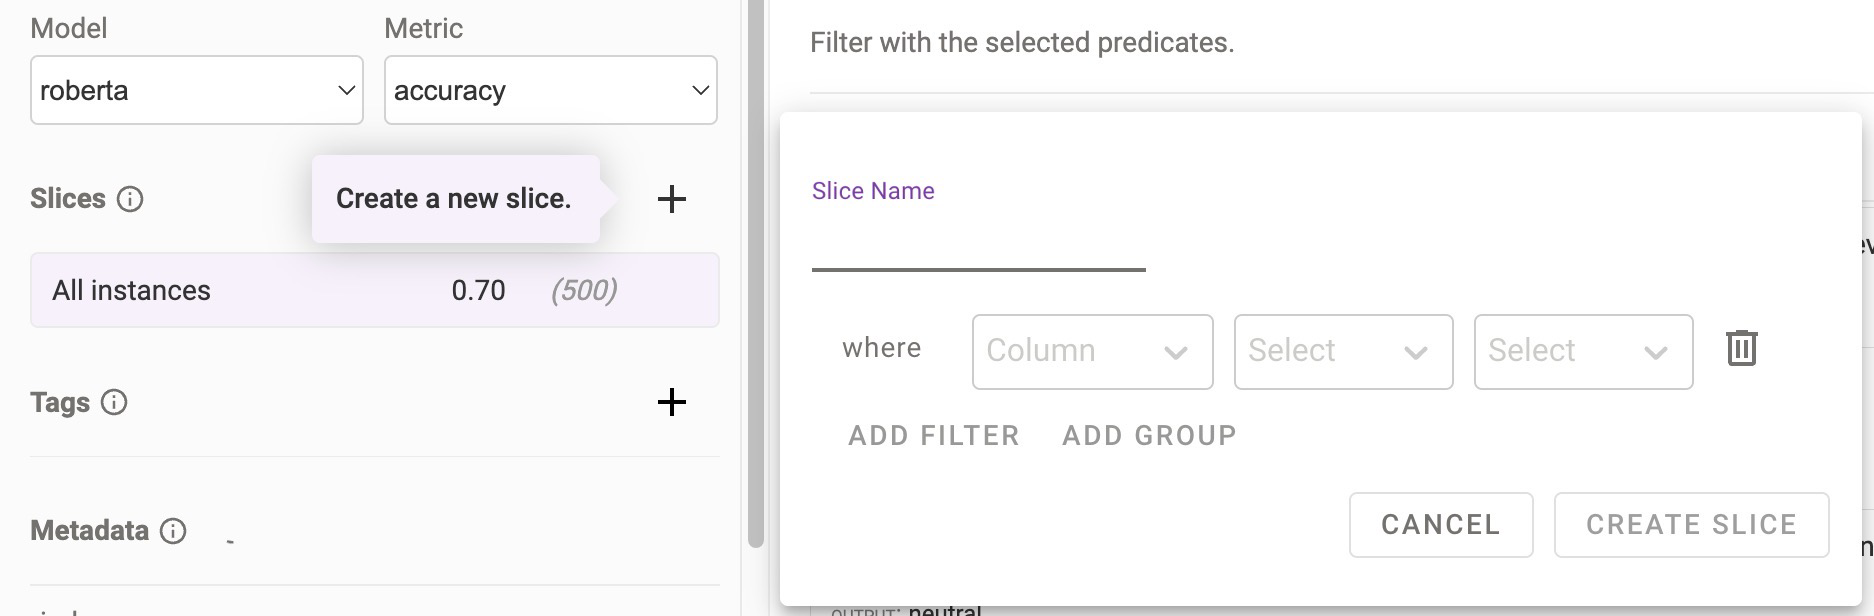

There are more fun features in Zeno, including interactive metadata & model comparison -- check [README](https://github.com/zeno-ml/zeno) of Zeno repository.

In [ ]:
from zeno import zeno

from zeno.api import model, distill, metric
from zeno.api import ModelReturn, MetricReturn, DistillReturn, ZenoOptions

@model
def load_model(model_name):
    
    def pred(df, ops: ZenoOptions):
        out = df[model_name]
        return ModelReturn(model_output=out)

    return pred

@distill
def label_match(df, ops: ZenoOptions):
    results = (df[ops.label_column] == df[ops.output_column]).to_list()
    return DistillReturn(distill_output=results)

@metric
def accuracy(df, ops: ZenoOptions):
    avg = df[ops.distill_columns["label_match"]].mean()
    return MetricReturn(metric=avg)

zeno({
    "metadata": df, # Pandas DataFrame with a row for each instance
    "view": "text-classification", # The type of view for this data/task
    "data_column": "text", 
    "label_column": "label",
    "functions": [load_model, label_match, accuracy],
    "models": ["roberta", "gpt2"],
    "port": 8231
})



After successfully creating the two slices, come up with three *additional* slices you want to check and **create** the slices in the Zeno interface.

There are two directions to identify useful slices:
- Top-down: Think about what kinds of things the model can struggle with, and come up with some slices.
- Bottom-up: Look at model (mis-)predictions, come up with hypotheses, and translate them into data slices.

3. [YOUR CHOICE]
4. [YOUR CHOICE]
5. [YOUR CHOICE]

In [ ]:
## Write down descriptions of additional slices you created

custom_slice_descriptions = [
    "",
]

# Step 6 - Write down three addition data slices you want to create but do not have the metadata for slicing

In the previous step, you might have already come up with some slices you wanted to create but found it hard to do with existing metadata. Write down three of such slices in this step.

Example: 
- I want to create a slice on tweets using slangs
- I want to create a slice on non-English tweets (if any)

In [ ]:
## Write down three additional data slices here:

additional_slice_descriptions = [
    "",
]

# Step 7 - Generate more test cases with Large Language Models

Select one slice from the three you wrote down and generate **10 test cases** using LLMs, which can include average case, boundary case, or difficult case.

Your input can be in the following format:

> Examples:
> - OH: “I had a blue penis while I was this” [playing with Google Earth VR]
> - @user @user That’s coming, but I think the victims are going to be Medicaid recipients.
> - I think I may be finally in with the in crowd #mannequinchallenge  #grads2014 @user
> 
> Generate more tweets using slangs.

The first part of **Examples** conditions the LLM on the style, length, and content of examples. The second part of **Instructions** instructs what kind of examples you want LLM to generate.

Use our provided GPTs to start the task: [llm-based-test-case-generator](https://chatgpt.com/g/g-982cylVn2-llm-based-test-case-generator). If you do not have access to GPTs, use the plain ChatGPT or other LLM providers you have access to instead.

In [ ]:
## Write down the slice you select

slice_description = ""

## Write down all generated test cases here

generated_test_cases = [
    "",
]